In [1]:
#Crear las carpetas para subir las imagenes
!mkdir hamburguesas
!mkdir pizzas
!mkdir sushi
!mkdir tacos

In [ ]:
!ls /content/hamburguesas | wc -l #191
!ls /content/pizzas | wc -l #184
!ls /content/sushi | wc -l #248
!ls /content/tacos | wc -l #281

191
184
247
281


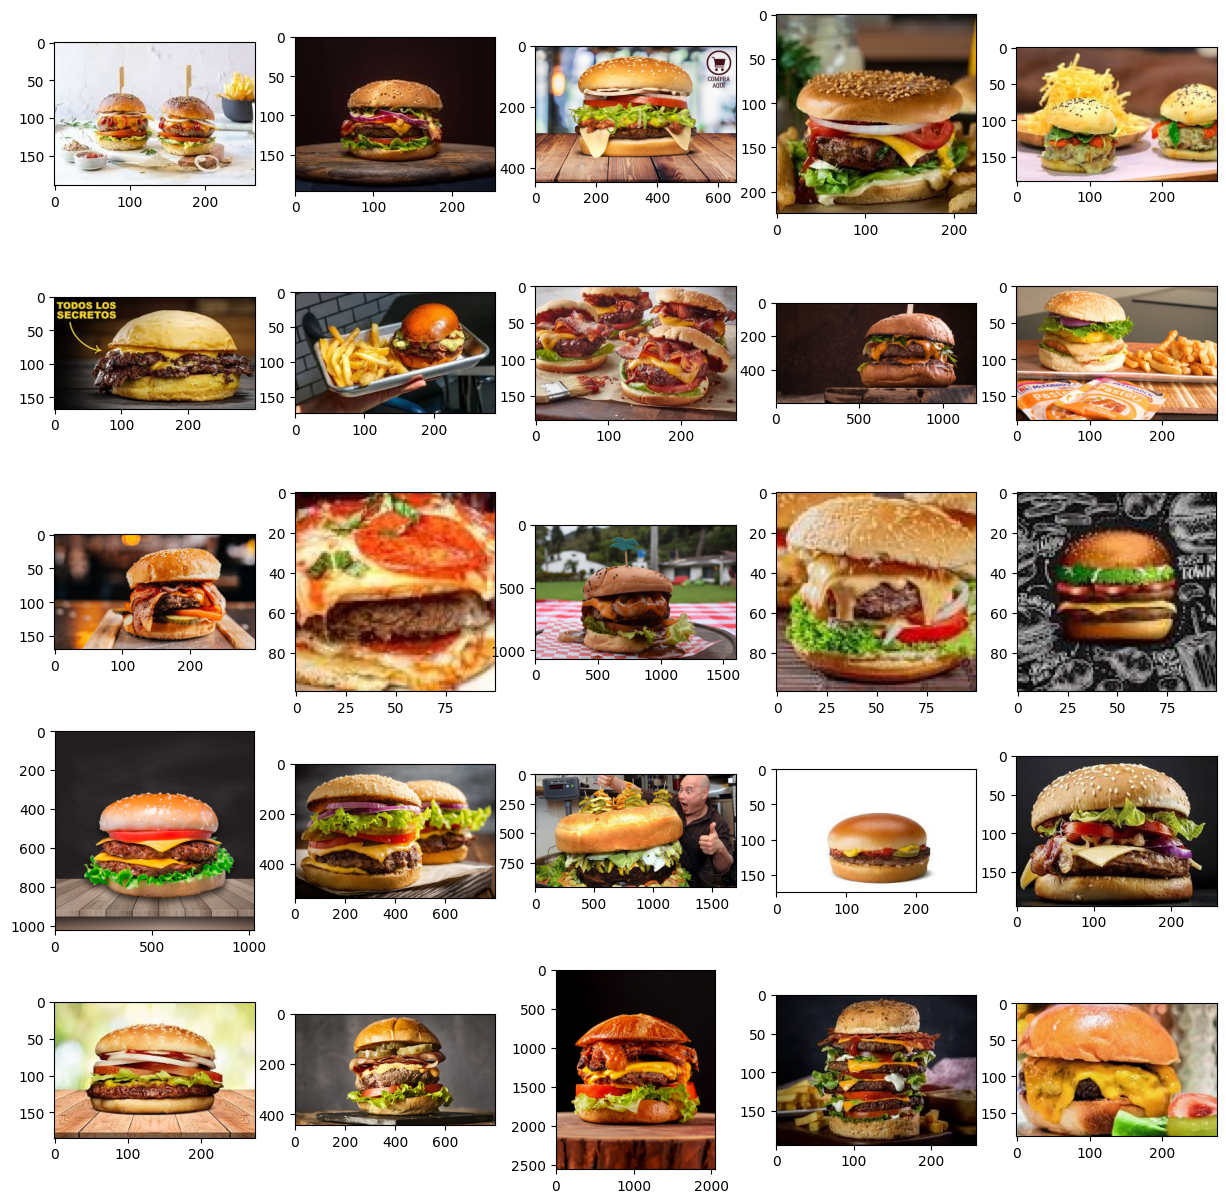

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/hamburguesas'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [2]:
#Crear carpetas para hacer el set de datos
!mkdir dataset
!mkdir dataset/hamburguesas
!mkdir dataset/pizzas
!mkdir dataset/sushi
!mkdir dataset/tacos

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 180 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/hamburguesas'
carpeta_destino = '/content/dataset/hamburguesas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 180:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil
carpeta_fuente = '/content/pizzas/'
carpeta_destino = '/content/dataset/pizzas/'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 180:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil
carpeta_fuente = '/content/sushi/'
carpeta_destino = '/content/dataset/sushi/'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 180:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
import shutil
carpeta_fuente = '/content/tacos/'
carpeta_destino = '/content/dataset/tacos/'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 180:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/hamburguesas/ | wc -l
!ls /content/dataset/pizzas/| wc -l
!ls /content/dataset/sushi/ | wc -l
!ls /content/dataset/tacos/ | wc -l


180
180
180
180


Found 576 images belonging to 4 classes.
Found 144 images belonging to 4 classes.


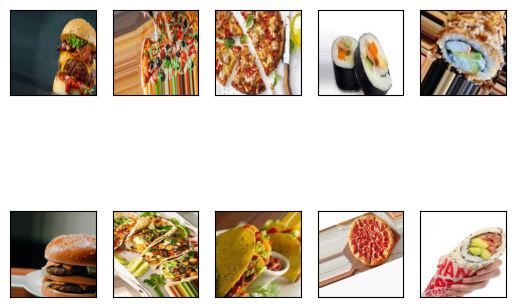

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
#Compilar
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 1.2255 - accuracy: 0.4983

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/18 [==============================] - 47s 2s/step - loss: 1.2255 - accuracy: 0.4983 - val_loss: 0.6646 - val_accuracy: 0.8056
Epoch 2/50
18/18 [==============================] - 51s 3s/step - loss: 0.6414 - accuracy: 0.7917 - val_loss: 0.4367 - val_accuracy: 0.8681
Epoch 3/50
18/18 [==============================] - 38s 2s/step - loss: 0.4654 - accuracy: 0.8385 - val_loss: 0.3600 - val_accuracy: 0.8889
Epoch 4/50
18/18 [==============================] - 38s 2s/step - loss: 0.3878 - accuracy: 0.8802 - val_loss: 0.3753 - val_accuracy: 0.8472
Epoch 5/50
18/18 [==============================] - 38s 2s/step - loss: 0.3619 - accuracy: 0.8733 - val_loss: 0.3124 - val_accuracy: 0.9028
Epoch 6/50
18/18 [==============================] - 38s 2s/step - loss: 0.2960 - accuracy: 0.9167 - val_loss: 0.2526 - val_accuracy: 0.9167
Epoch 7/50
18/18 [==============================] - 38s 2s/step - loss: 0.2749 - accuracy: 0.9132 - val_loss: 0.2547 - val_accuracy: 0.9236
Epoch 8/50
18/18 [=============

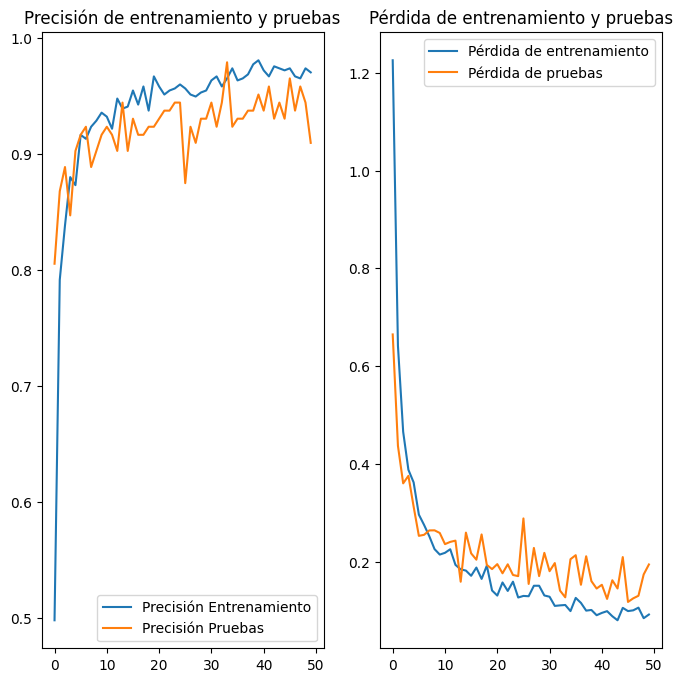

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
# Define un diccionario de mapeo de clases a nombres de alimentos
mapeo_clases_a_alimentos = {
    0: 'hamburguesa',
    1: 'pizza',
    2: 'sushi',
    3: 'taco'
}
url = 'https://www.unileverfoodsolutions.com.co/dam/global-ufs/mcos/NOLA/calcmenu/recipes/col-recipies/fruco-tomate-cocineros/HAMBURGUESA%201200x709.png'
prediccion = categorizar(url)
# Utiliza la predicción numérica para obtener el nombre del alimento
nombre_alimento = mapeo_clases_a_alimentos.get(prediccion, 'Clase Desconocida')

# Imprime la predicción numérica y el nombre del alimento
print(f'El alimento visualizado es {prediccion} = {nombre_alimento}')

1/1 [==============================] - 0s 60ms/step
El alimento visualizado es 0 = hamburguesa


In [ ]:
mapeo_clases_a_alimentos = {
    0: 'hamburguesa',
    1: 'pizza',
    2: 'sushi',
    3: 'taco'
}
url = 'https://images-gmi-pmc.edge-generalmills.com/e59f255c-7498-4b84-9c9d-e578bf5d88fc.jpg'
prediccion = categorizar(url)
# Utiliza la predicción numérica para obtener el nombre del alimento
nombre_alimento = mapeo_clases_a_alimentos.get(prediccion, 'Clase Desconocida')

# Imprime la predicción numérica y el nombre del alimento
print(f'El alimento visualizado es {prediccion} = {nombre_alimento}')

1/1 [==============================] - 0s 77ms/step
El alimento visualizado es 3 = taco


In [ ]:
mapeo_clases_a_alimentos = {
    0: 'hamburguesa',
    1: 'pizza',
    2: 'sushi',
    3: 'taco'
}
url = 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/KO6XMOQNAEI63CHIYWG4HW5O4I.jpg&w=1200'
prediccion = categorizar(url)
# Utiliza la predicción numérica para obtener el nombre del alimento
nombre_alimento = mapeo_clases_a_alimentos.get(prediccion, 'Clase Desconocida')

# Imprime la predicción numérica y el nombre del alimento
print(f'El alimento visualizado es {prediccion} = {nombre_alimento}')

1/1 [==============================] - 0s 48ms/step
El alimento visualizado es 1 = pizza


In [ ]:
mapeo_clases_a_alimentos = {
    0: 'hamburguesa',
    1: 'pizza',
    2: 'sushi',
    3: 'taco'
}
url = 'https://www.elespectador.com/resizer/_tz4_vb174Hd4nrF2OMI98pvFug=/525x350/filters:quality(70):format(jpeg)/cloudfront-us-east-1.images.arcpublishing.com/elespectador/JLYGWDUSXFDI7ITQECOXNAG674.jpg'
prediccion = categorizar(url)
# Utiliza la predicción numérica para obtener el nombre del alimento
nombre_alimento = mapeo_clases_a_alimentos.get(prediccion, 'Clase Desconocida')

# Imprime la predicción numérica y el nombre del alimento
print(f'El alimento visualizado es {prediccion} = {nombre_alimento}')

1/1 [==============================] - 0s 224ms/step
El alimento visualizado es 2 = sushi
